# Explicit Runge-Kutta Methods Exercises


`````{admonition} Exercise 2.1
:class: note
:name: ex2.1

Write the following Runge-Kutta method in a Butcher tableau.
\begin{align*}
    y_{n+1} &=y_n +\frac{h}{6}(k_1 +4k_3 +k_4 ),\\
    k_1 &=f(t_n ,y_n ),\\
    k_2 &=f(t_n +\tfrac{1}{4}h,y_n +\tfrac{1}{4}hk_1 ),\\
    k_3 &=f(t_n +\tfrac{1}{2}h,y_n +\tfrac{1}{2}hk_2 ),\\
    k_4 &=f(t_n +h,y_n +h(k_1 -2k_2 +2k_3 )).
\end{align*}

````{dropdown} Solution

\begin{align*}
    \begin{array}{c|cccc}
        0 & 0 \\
        \frac{1}{4} & \frac{1}{4} \\
        \frac{1}{2} & 0 & \frac{1}{2} \\
        1 & 1 & -2 & 2 \\ \hline
        & \frac{1}{6} & 0 & \frac{2}{3} & \frac{1}{6}
    \end{array}
\end{align*}
````
`````

`````{admonition} Exercise 2.2
:class: note
:name: ex2.2

Write out the equations for the following Runge-Kutta method.
\begin{align*}\begin{array}{c|cccc}
    0 &  &  &  & \\
    \frac{1}{4} & \frac{1}{4} &  &  & \\
    \frac{1}{2} & -\frac{1}{2} & 1 &  & \\
    1 & \frac{1}{4} & 0 & \frac{3}{4} & \\ \hline
    & 0 & \frac{4}{9} & \frac{1}{3} & \frac{2}{9}
\end{array}\end{align*}

````{dropdown} Solution

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{9}(4k_2 + 3k_3 + 2k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{4}h, y_n + \tfrac{1}{4} h k_1), \\
    k_3 &= f(t_n + \tfrac{1}{2}h, y_n + h ( - \tfrac{1}{2}k_1 + k_2)), \\
    k_4 &= f(t_n + h, y_n + h ( \tfrac{1}{4}k_1 + \tfrac{3}{4}k_3)).
\end{align*}
````
`````

`````{admonition} Exercise 2.3
:class: note
:name: ex2.3

Using pen and paper, derive an explicit second-order Runge-Kutta method where $b_1 =\frac{1}{3}$.

````{dropdown} Solution
The order conditions are:
\begin{align*}
    \frac{1}{3} + b_2 &=1,\\
    c_2 b_2 &=\frac{1}{2},\\
    a_{21} b_2 &=\frac{1}{2}
\end{align*}

Solving gives $b_2 = \frac{2}{3}$, $c_2=\frac{3}{4}$ and $a_{21} = \frac{3}{4}$ so the method is

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{3}(k_1 + 2k_2), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{3}{4}h, y_n + \tfrac{3}{4}h k_1).
\end{align*}

Alternatively as a Butcher tableau
\begin{align*}
    \begin{array}{c|cc}
    0 & 0 \\
    \frac{3}{4} & \frac{3}{4} & 0 \\ \hline
    & \frac{1}{3} & \frac{2}{3}
    \end{array}
\end{align*}
````
`````

`````{admonition} Exercise 2.4
:class: note
:name: ex2.4

Repeat [exercise 2.3](ex2.3) using Python to solve the order conditions.

````{dropdown} Solution

Code:
```python
from sympy import *
init_printing()

# Declare symbolic variables
a21, b1, b2, c2 = symbols('a21, b1, b2, c2')
b1 = Rational(1,3)

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - Rational(1,2)
eq3 = a21 * b2 - Rational(1,2)

# Solve order conditions
solve((eq1, eq2, eq3))
```

Output:

```{glue:math} ex2.4
:label: ex2.4-glue
```

````
`````

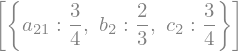

In [1]:
from sympy import *
from myst_nb import glue
init_printing()

# Declare symbolic variables
a21, b1, b2, c2 = symbols('a21, b1, b2, c2')
b1 = Rational(1,3)

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - Rational(1,2)
eq3 = a21 * b2 - Rational(1,2)

# Solve order conditions
sol = solve((eq1, eq2, eq3))
glue("ex2.4", sol)

`````{admonition} Exercise 2.5
:class: note
:name: ex2.5

Derive an explicit fourth-order Runge-Kutta method where $b_1 = 0$ and $c_2 =\frac{1}{5}$.

````{dropdown} Solution
Code
```python
from sympy import *
init_printing()

# Declare symbolic variables
a21, a31, a32, a41, a42, a43 = symbols('a21, a31, a32, a41, a42, a43')
b1, b2, b3, b4 = symbols('b1, b2, b3, b4')
c2, c3, c4 = symbols('c2, c3, c4')

# Choose values for the unkowns
b1, c2 = 0, Rational(1,5)

# Define order conditions
eq1 = b1 + b2 + b3 + b4 - 1
eq2 = b2 * c2 + b3 * c3 + b4 * c4 - Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 + b4 * c4 ** 2 - Rational(1,3)
eq4 = b2 * c2 ** 3 + b3 * c3 ** 3 + b4 * c4 ** 4 - Rational(1,4)
eq5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) - Rational(1,8)
eq6 = b3 * a32 + b4 * a42 - b2 * (1 - c2)
eq7 = b4 * a43 - b3 * (1 - c3)
eq8 = b4 * (1 - c4)
eq9 = c2 - a21
eq10 = c3 - a31 - a32
eq11 = c4 - a41- a42 - a43

# Solve order conditions
solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11))
```
Output:
```{glue:math} ex2.5
:label: ex2.5-glue
```

So the method is

\begin{align*}
    y_{n+1} &= y_n + h(\tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{5}h, y_n + \tfrac{1}{5}h k_1), \\
    k_3 &= f(t_n + \tfrac{3}{4}h, y_n + h(-\tfrac{31}{32} k_1 + \tfrac{55}{32} k_2)), \\
    k_4 &= f(t_n + h, y_n + h(9 k_1 - \tfrac{120}{11} k_2 + \tfrac{32}{11} k_3)).
\end{align*}

Alternatively as a Butcher tableau

\begin{align*}
    \begin{array}{c|cccc}
    0 & 0 \\
    \frac{1}{5} & \frac{1}{5} \\
    \frac{3}{4} & -\frac{31}{32} & \frac{55}{32} \\
    1 & 9 & -\frac{120}{11} & \frac{32}{11} \\
    \hline
    & 0 & \frac{125}{264} & \frac{16}{33} & \frac{1}{24}
    \end{array}
\end{align*}

````
`````

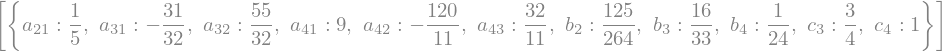

In [2]:
from sympy import *
from myst_nb import glue
init_printing()

# Declare symbolic variables
a21, a31, a32, a41, a42, a43 = symbols('a21, a31, a32, a41, a42, a43')
b1, b2, b3, b4 = symbols('b1, b2, b3, b4')
c2, c3, c4 = symbols('c2, c3, c4')

# Choose values for the unkowns
b1, c2 = 0, Rational(1,5)

# Define order conditions
eq1 = b1 + b2 + b3 + b4 - 1
eq2 = b2 * c2 + b3 * c3 + b4 * c4 - Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 + b4 * c4 ** 2 - Rational(1,3)
eq4 = b2 * c2 ** 3 + b3 * c3 ** 3 + b4 * c4 ** 4 - Rational(1,4)
eq5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) - Rational(1,8)
eq6 = b3 * a32 + b4 * a42 - b2 * (1 - c2)
eq7 = b4 * a43 - b3 * (1 - c3)
eq8 = b4 * (1 - c4)
eq9 = c2 - a21
eq10 = c3 - a31 - a32
eq11 = c4 - a41- a42 - a43

# Solve order conditions
sol =  solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11))
glue("ex2.5", sol)

`````{admonition} Exercise 2.6
:class: note
:name: ex2.6

Using pen and paper, apply your Runge-Kutta method derived in [exercise 2.3](ex2.3) to solve the following initial value problem using a step length of $h=0.4$

\begin{align*}
    y' =t-y, \qquad t\in [0,2],\qquad y(0)=1
\end{align*}

Write your solutions correct to 4 decimal places.

````{dropdown} Solution

| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |
|:-----:|:-------:|:-------:|:-------:|
|   0.0 |  1.0000 | -1.0000 | -0.4000 |
|   0.4 |  0.7600 | -0.3600 |  0.0480 |
|   0.8 |  0.7248 |  0.0752 |  0.3526 |
|   1.2 |  0.8289 |  0.3711 |  0.5598 |
|   1.6 |  1.0276 |  0.5724 |  0.7007 |
|   2.0 |  1.2908 |    -    |    -    |

````
`````

In [3]:
import numpy as np

def myrk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print("| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |")
    print("|:-----:|:-------:|:-------:|:-------:|")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k1)
        y[n+1,:] = y[n,:] + h / 3 * (k1 + 2 * k2)
        print(f"| {t[n]:5.1f} | {y[n,0]:7.4f} | {k1[0]:7.4f} | {k2[0]:7.4f} |")
    
    print(f"| {t[n+1]:5.1f} | {y[n+1,0]:7.4f} |    -    |    -    |")


def f(t, y):
    return t - y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

myrk2(f, tspan, y0, h)

| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |
|:-----:|:-------:|:-------:|:-------:|
|   0.0 |  1.0000 | -1.0000 | -0.4000 |
|   0.4 |  0.7600 | -0.3600 |  0.0480 |
|   0.8 |  0.7248 |  0.0752 |  0.3526 |
|   1.2 |  0.8289 |  0.3711 |  0.5598 |
|   1.6 |  1.0276 |  0.5724 |  0.7007 |
|   2.0 |  1.2908 |    -    |    -    |


`````{admonition} Exercise 2.7
:class: note
:name: ex2.7

Define a Python function called `myrk2()` which uses the method from derived in [exercise 2.3](ex2.3) to solve an initial value problem. Use your function to solve the initial value problem in [exercise 2.6](ex2.6) and produce a table of the solutions.

````{dropdown} Solution
Code
```python
import numpy as np

def myrk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k1)
        y[n+1,:] = y[n,:] + h / 3 * (k1 + 2 * k2)
    
    return t, y


def f(t, y):
    return t - y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Solve IVP
t, y = myrk2(f, tspan, y0, h)

# Print table of solutions
print("|  t  |    y    |")
print("|:---:|:-------:|")
for n in range(len(t)):
    print(f"| {t[n]:3.1f} | {y[n,0]:7.4f} |")
```
Output
```
|  t  |    y    |
|:---:|:-------:|
| 0.0 |  1.0000 |
| 0.4 |  0.7600 |
| 0.8 |  0.7248 |
| 1.2 |  0.8289 |
| 1.6 |  1.0276 |
| 2.0 |  1.2908 |
```
````
`````

In [4]:
import numpy as np

def myrk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k1)
        y[n+1,:] = y[n,:] + h / 3 * (k1 + 2 * k2)
    
    return t, y


def f(t, y):
    return t - y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Solve IVP
t, y = myrk2(f, tspan, y0, h)

# Print table of solutions
print("|  t  |    y    |")
print("|:---:|:-------:|")
for n in range(len(t)):
    print(f"| {t[n]:3.1f} | {y[n,0]:7.4f} |")

|  t  |    y    |
|:---:|:-------:|
| 0.0 |  1.0000 |
| 0.4 |  0.7600 |
| 0.8 |  0.7248 |
| 1.2 |  0.8289 |
| 1.6 |  1.0276 |
| 2.0 |  1.2908 |


`````{admonition} Exercise 2.8
:class: note
:name: ex2.8

Using pen and paper, apply your Runge-Kutta method derived in [exercise 2.5](ex2.5) to solve the initial value problem from [exercise 2.6](ex2.6) using a step length of $h=0.4$. Write your solutions correct to 4 decimal places.

````{dropdown} Solution
| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |  $k_3$  |  $k_4$  |
|:-----:|:-------:|:-------:|:-------:|:-------:|:-------:|
|  0.0  |  1.0000 | -1.0000 | -0.8400 | -0.5100 | -0.0720 |
|  0.4  |  0.7408 | -0.3408 | -0.2335 | -0.0123 |  0.2813 |
|  0.8  |  0.6989 |  0.1011 |  0.1730 |  0.3214 |  0.5182 |
|  1.2  |  0.8026 |  0.3974 |  0.4456 |  0.5450 |  0.6770 |
|  1.6  |  1.0040 |  0.5960 |  0.6283 |  0.6950 |  0.7835 |
|  2.0  |  1.2708 |    -    |    -    |    -    |    -    |
````
`````

In [5]:
import numpy as np

def myrk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print("| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |  $k_3$  |  $k_4$  |")
    print("|:-----:|:-------:|:-------:|:-------:|:-------:|:-------:|")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/5 * h, y[n,:] + 1/5 * h * k1)
        k3 = f(t[n] + 3/4 * h, y[n,:] + h / 32 * (-31 * k1 + 55 * k2))
        k4 = f(t[n] + h, y[n,:] + h / 11 * (99 * k1 - 120 * k2 + 32 * k3))
        y[n+1,:] = y[n,:] + h * (125/264 * k2 + 16/33 * k3 + 1/24 * k4)
        print(f"|  {t[n]:3.1f}  | {y[n,0]:7.4f} | {k1[0]:7.4f} | {k2[0]:7.4f} | {k3[0]:7.4f} | {k4[0]:7.4f} |")
    
    print(f"|  {t[n+1]:3.1f}  | {y[n+1,0]:7.4f} |    -    |    -    |    -    |    -    |")


def f(t, y):
    return t - y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

myrk4(f, tspan, y0, h)

| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |  $k_3$  |  $k_4$  |
|:-----:|:-------:|:-------:|:-------:|:-------:|:-------:|
|  0.0  |  1.0000 | -1.0000 | -0.8400 | -0.5100 | -0.0720 |
|  0.4  |  0.7408 | -0.3408 | -0.2335 | -0.0123 |  0.2813 |
|  0.8  |  0.6989 |  0.1011 |  0.1730 |  0.3214 |  0.5182 |
|  1.2  |  0.8026 |  0.3974 |  0.4456 |  0.5450 |  0.6770 |
|  1.6  |  1.0040 |  0.5960 |  0.6283 |  0.6950 |  0.7835 |
|  2.0  |  1.2708 |    -    |    -    |    -    |    -    |


`````{admonition} Exercise 2.9
:class: note
:name: ex2.9

Repeat [exercise 2.8](ex2.8) using the [classic fourth-order Runge-Kutta method (RK4)](rk4-definition). What do your answers tell you about the method derived in [exercise 2.5](ex2.5) and the RK4 method?

````{dropdown} Solution
| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |  $k_3$  |  $k_4$  |
|:-----:|:-------:|:-------:|:-------:|:-------:|:-------:|
|  0.0  |  1.0000 | -1.0000 | -0.6000 | -0.6800 | -0.3280 |
|  0.4  |  0.7408 | -0.3408 | -0.0726 | -0.1263 |  0.1097 |
|  0.8  |  0.6989 |  0.1011 |  0.2809 |  0.2449 |  0.4031 |
|  1.2  |  0.8026 |  0.3974 |  0.5179 |  0.4938 |  0.5999 |
|  1.6  |  1.0040 |  0.5960 |  0.6768 |  0.6607 |  0.7318 |
|  2.0  |  1.2708 |    -    |    -    |    -    |    -    |

The solution for $y_n$ are the same as that using the method derived in [exercise 2.5](ex2.5) function showing that it is equivalent the RK4 method.
````
`````

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print("| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |  $k_3$  |  $k_4$  |")
    print("|:-----:|:-------:|:-------:|:-------:|:-------:|:-------:|")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n,:] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        print(f"|  {t[n]:3.1f}  | {y[n,0]:7.4f} | {k1[0]:7.4f} | {k2[0]:7.4f} | {k3[0]:7.4f} | {k4[0]:7.4f} |")
    
    print(f"|  {t[n+1]:3.1f}  | {y[n+1,0]:7.4f} |    -    |    -    |    -    |    -    |")
    
    return t, y 


# Calculate the solution to the IVP
h = 0.4
t, y = rk4(f, tspan, y0, h)

| $t_n$ |  $y_n$  |  $k_1$  |  $k_2$  |  $k_3$  |  $k_4$  |
|:-----:|:-------:|:-------:|:-------:|:-------:|:-------:|
|  0.0  |  1.0000 | -1.0000 | -0.6000 | -0.6800 | -0.3280 |
|  0.4  |  0.7408 | -0.3408 | -0.0726 | -0.1263 |  0.1097 |
|  0.8  |  0.6989 |  0.1011 |  0.2809 |  0.2449 |  0.4031 |
|  1.2  |  0.8026 |  0.3974 |  0.5179 |  0.4938 |  0.5999 |
|  1.6  |  1.0040 |  0.5960 |  0.6768 |  0.6607 |  0.7318 |
|  2.0  |  1.2708 |    -    |    -    |    -    |    -    |


`````{admonition} Exercise 2.10
:class: note
:name: ex2.10

Define a Python function called `myrk4()` which uses the method from [exercise 2.5](ex2.5) to solve an initial value problem. Use your function to solve the initial value problem in [exercise 2.6](ex2.6). The exact solution is $y = t + 2e^{-t} - 1$, produce a plot comparing your numerical solutions using the `myrk2()` from [exercise 2.7](ex2.7) and `myrk4()` functions and the exact solutions on the same set of axes.

````{dropdown} Solution

Code 

```python
import numpy as np
import matplotlib.pyplot as plt

def myrk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.2 * h, y[n,:] + 0.2 * h * k1)
        k3 = f(t[n] + 0.75 * h, y[n,:] + h * (-31/32 * k1 + 55/32 * k2))
        k4 = f(t[n] + h, y[n,:] + h * (9 * k1 - 120/11 * k2 + 32/11 * k3))
        y[n+1,:] = y[n,:] + h * (125/264 * k2 + 16/33 * k3 + 1/24 * k4)
        
    return t, y 


def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y = myrk4(f, tspan, y0, h)

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="myRK4")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()
```

Plot

```{glue:} ex2.10_plot
```

````
`````

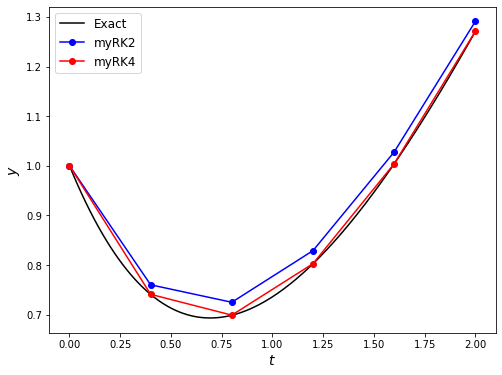

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def myrk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k1)
        y[n+1,:] = y[n,:] + h / 3 * (k1 + 2 * k2)

    return t, y


def myrk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 0.2 * h, y[n,:] + 0.2 * h * k1)
        k3 = f(t[n] + 0.75 * h, y[n,:] + h * (-31/32 * k1 + 55/32 * k2))
        k4 = f(t[n] + h, y[n,:] + h * (9 * k1 - 120/11 * k2 + 32/11 * k3))
        y[n+1,:] = y[n,:] + h * (125/264 * k2 + 16/33 * k3 + 1/24 * k4)
        
    return t, y 


def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solutions to the IVP
t, y_myrk2 = myrk2(f, tspan, y0, h)
t, y_myrk4 = myrk4(f, tspan, y0, h)
    
# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_myrk2, "bo-", label="myRK2")
plt.plot(t, y_myrk4, "ro-", label="myRK4")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

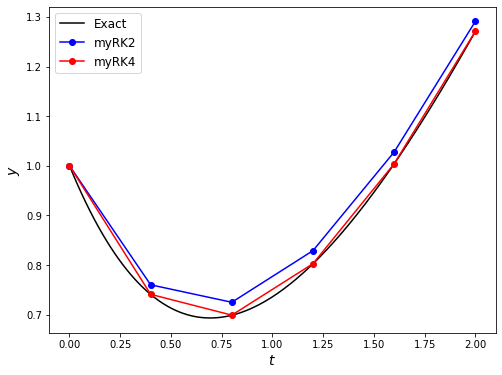

In [8]:
from myst_nb import glue
glue("ex2.10_plot", fig, display=False)

`````{admonition} Exercise 2.11
:class: note
:name: ex2.11

Use your functions `myrk2()` and `myrk4()` from [exercises 2.7](ex2.7) and [2.10](ex2.10) to solve the initial value problem from [exercise 2.6](ex2.6) using a range of step lengths starting at $h=0.4$ and halving each time until $h=0.025$. Plot the global truncation errors for the numerical solutions for $y(2)$ against $h$ on a loglog scale and estimate the order of the two methods.

````{dropdown} Solution

Code
```python
# Calculate solution for decreasing step lengths and plot the solution
h_vals = [0.4, 0.1, 0.05, 0.025]
E_myrk2, E_myrk4 = [], []
for h in h_vals:
    t, y = myrk2(f, tspan, y0, h)
    E_myrk2.append(abs(y_exact[-1] - y[-1,0]))
    t, y = myrk4(f, tspan, y0, h)
    E_myrk4.append(abs(y_exact[-1] - y[-1,0]))

# Plot errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.loglog(h_vals, E_myrk2, "bo-", label="myRK2")
plt.loglog(h_vals, E_myrk4, "ro-", label="myRK4")
plt.xlabel(r"$\log(h)$", fontsize=16)
plt.ylabel(r"$\log(E)$", fontsize=16)
plt.legend(fontsize=12)
plt.show()

# Output table of errors
print("|   h   | myRK2 error | myRK4 error |")
print("|:-----:|:-----------:|:-----------:|")
for i in range(len(h_vals)):
    print(f"| {h_vals[i]:5.3f} |   {E_myrk2[i]:0.2e}  |   {E_myrk4[i]:0.2e}  |")
print()
    
# Estimate the order of the methods
myrk2_order = (np.log(E_myrk2[0]) - np.log(E_myrk2[-1])) / (np.log(h_vals[0]) - np.log(h_vals[-1]))
myrk4_order = (np.log(E_myrk4[0]) - np.log(E_myrk4[-1])) / (np.log(h_vals[0]) - np.log(h_vals[-1]))
print(f"myRK2 order = {myrk4_order:0.2f}\nmyRK4 order = {myrk2_order:0.2f}")
```

Output

```{glue:} ex2.10_plot
```

```
|   h   | myRK2 error | myRK4 error |
|:-----:|:-----------:|:-----------:|
| 0.400 |   2.01e-02  |   1.61e-04  |
| 0.100 |   9.74e-04  |   4.90e-07  |
| 0.050 |   2.34e-04  |   2.94e-08  |
| 0.025 |   5.75e-05  |   1.80e-09  |

myRK2 order = 4.11
myRK4 order = 2.11
```

````
`````

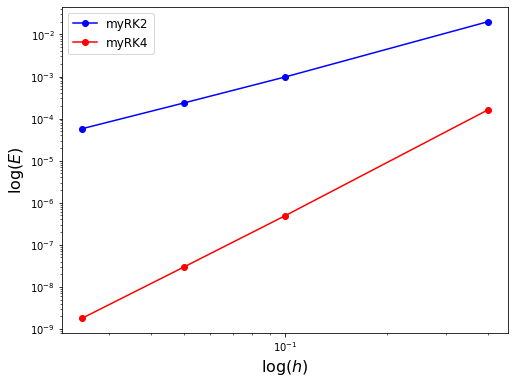

|   h   | myRK2 error | myRK4 error |
|:-----:|:-----------:|:-----------:|
| 0.400 |   2.01e-02  |   1.61e-04  |
| 0.100 |   9.74e-04  |   4.90e-07  |
| 0.050 |   2.34e-04  |   2.94e-08  |
| 0.025 |   5.75e-05  |   1.80e-09  |

myRK2 order = 4.11
myRK4 order = 2.11


In [9]:
# Calculate solution for decreasing step lengths and plot the solution
h_vals = [0.4, 0.1, 0.05, 0.025]
E_myrk2, E_myrk4 = [], []
for h in h_vals:
    t, y = myrk2(f, tspan, y0, h)
    E_myrk2.append(abs(y_exact[-1] - y[-1,0]))
    t, y = myrk4(f, tspan, y0, h)
    E_myrk4.append(abs(y_exact[-1] - y[-1,0]))

# Plot errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.loglog(h_vals, E_myrk2, "bo-", label="myRK2")
plt.loglog(h_vals, E_myrk4, "ro-", label="myRK4")
plt.xlabel(r"$\log(h)$", fontsize=16)
plt.ylabel(r"$\log(E)$", fontsize=16)
plt.legend(fontsize=12)
plt.show()

# Output table of errors
print("|   h   | myRK2 error | myRK4 error |")
print("|:-----:|:-----------:|:-----------:|")
for i in range(len(h_vals)):
    print(f"| {h_vals[i]:5.3f} |   {E_myrk2[i]:0.2e}  |   {E_myrk4[i]:0.2e}  |")
print()
    
# Estimate the order of the methods
myrk2_order = (np.log(E_myrk2[0]) - np.log(E_myrk2[-1])) / (np.log(h_vals[0]) - np.log(h_vals[-1]))
myrk4_order = (np.log(E_myrk4[0]) - np.log(E_myrk4[-1])) / (np.log(h_vals[0]) - np.log(h_vals[-1]))
print(f"myRK2 order = {myrk4_order:0.2f}\nmyRK4 order = {myrk2_order:0.2f}")


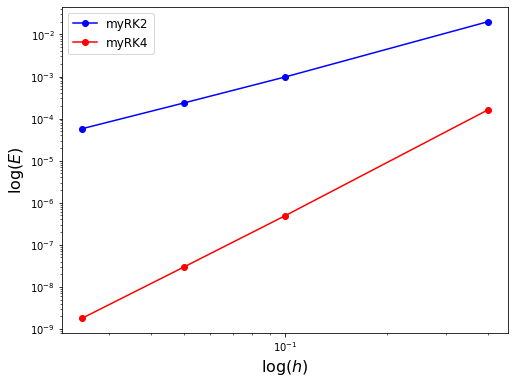

In [10]:
glue("ex2.10_plot", fig, display=False)